In [2]:
import keras

In [3]:
from keras.datasets import imdb

In [4]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
train_data[0][0]

1

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3 , '.') for i in train_data[0]])

In [7]:
decoded_review

". this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert . is an amazing actor and now the same being director . father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for . and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also . to the two little boy's that played the . of norman and paul they were just brilliant children are often left out of the . list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
len(train_data)

25000

In [9]:
len(test_data)

25000

In [10]:
len(train_labels)

25000

In [11]:
len(test_labels)

25000

In [12]:
enumerate(train_data)

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [16]:
x_train.shape

(25000, 10000)

In [17]:
len(x_train)

25000

In [18]:
type(x_train)

numpy.ndarray

In [21]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
x_val = x_train[:12000]
partial_x_train = x_train[12000:]

y_val = y_train[:12000]
partial_y_train = y_train[12000:]

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
26/26 [==============================] - 1s 34ms/step - loss: 0.5747 - accuracy: 0.7459 - val_loss: 0.4589 - val_accuracy: 0.8322
Epoch 2/20
26/26 [==============================] - 0s 11ms/step - loss: 0.3681 - accuracy: 0.8825 - val_loss: 0.3569 - val_accuracy: 0.8640
Epoch 3/20
26/26 [==============================] - 0s 12ms/step - loss: 0.2739 - accuracy: 0.9111 - val_loss: 0.3087 - val_accuracy: 0.8814
Epoch 4/20
26/26 [==============================] - 0s 11ms/step - loss: 0.2185 - accuracy: 0.9296 - val_loss: 0.2853 - val_accuracy: 0.8878
Epoch 5/20
26/26 [==============================] - 0s 12ms/step - loss: 0.1792 - accuracy: 0.9428 - val_loss: 0.2828 - val_accuracy: 0.8862
Epoch 6/20
26/26 [==============================] - 0s 11ms/step - loss: 0.1504 - accuracy: 0.9530 - val_loss: 0.2868 - val_accuracy: 0.8836
Epoch 7/20
26/26 [==============================] - 0s 11ms/step - loss: 0.1290 - accuracy: 0.9603 - val_loss: 0.3077 - val_accuracy: 0.8763
Epoch 8/20
26

In [25]:
model.predict(x_test)

782/782 [==============================] - 0s 439us/step


array([[0.01963704],
       [0.9999995 ],
       [0.99427855],
       ...,
       [0.00398545],
       [0.00644996],
       [0.9820396 ]], dtype=float32)

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

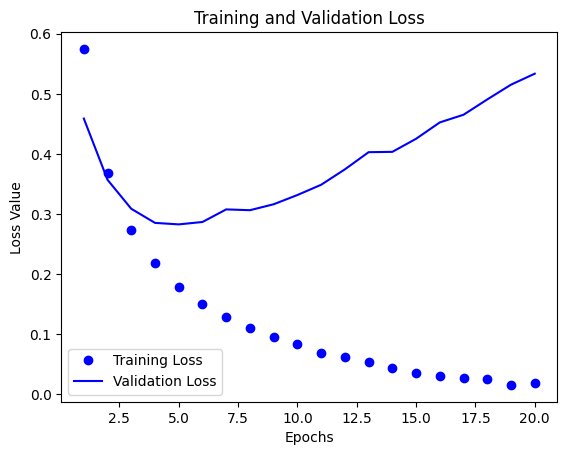

In [32]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

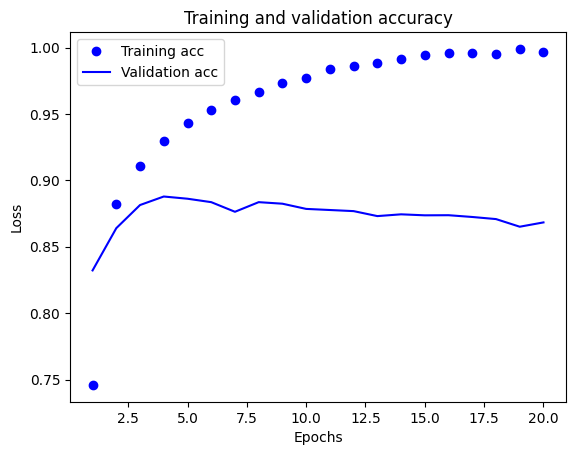

In [36]:
plt.clf() #Clears the figure 
acc_values = history_dict['accuracy'] 
val_acc_values = history_dict['val_accuracy'] 
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()